In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
 '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('/content/earthquakes-1.csv')

In [26]:
quakes.assign(
 time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
 "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


<Axes: xlabel='magType', ylabel='mag'>

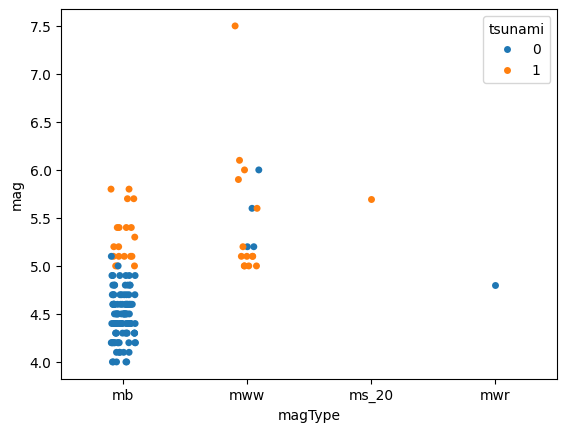

In [27]:
sns.stripplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)


<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


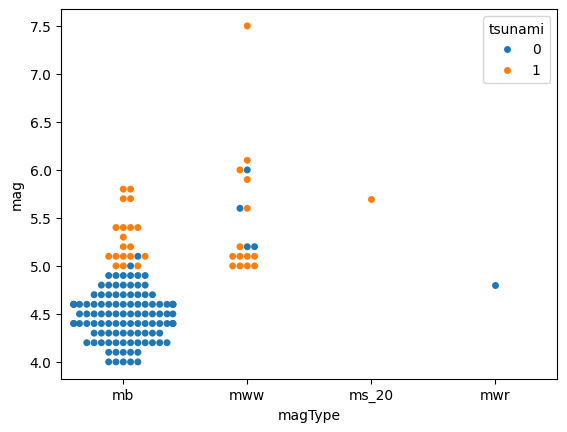

In [28]:
sns.swarmplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)

<Axes: >

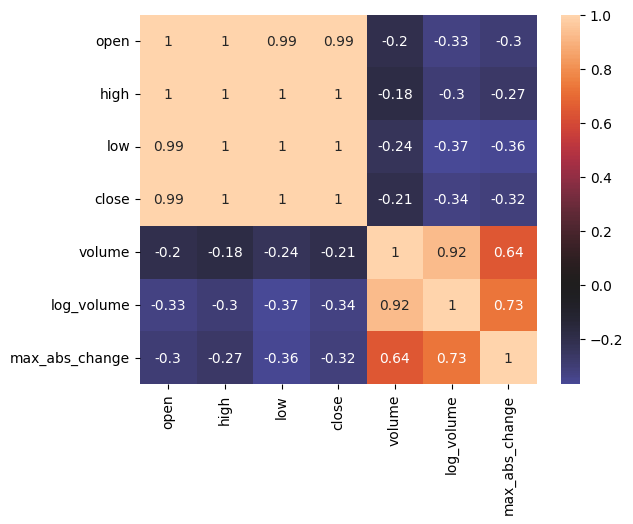

In [29]:
sns.heatmap(
 fb.sort_index().assign(
 log_volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).corr(), annot=True, center=0
)

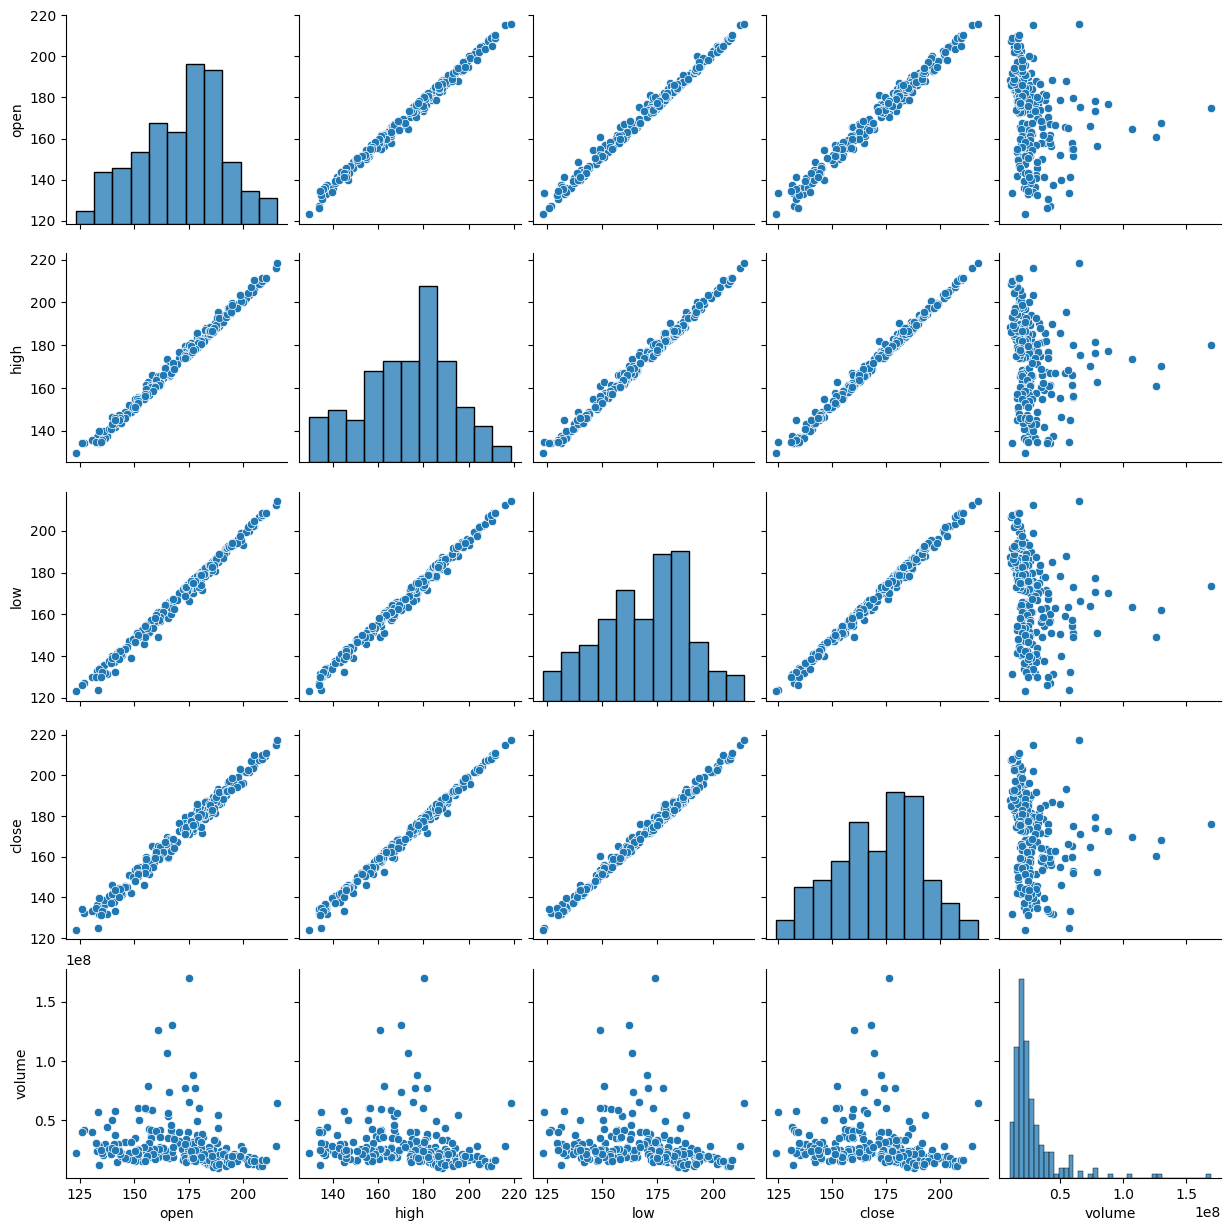

In [30]:
sns.pairplot(fb)

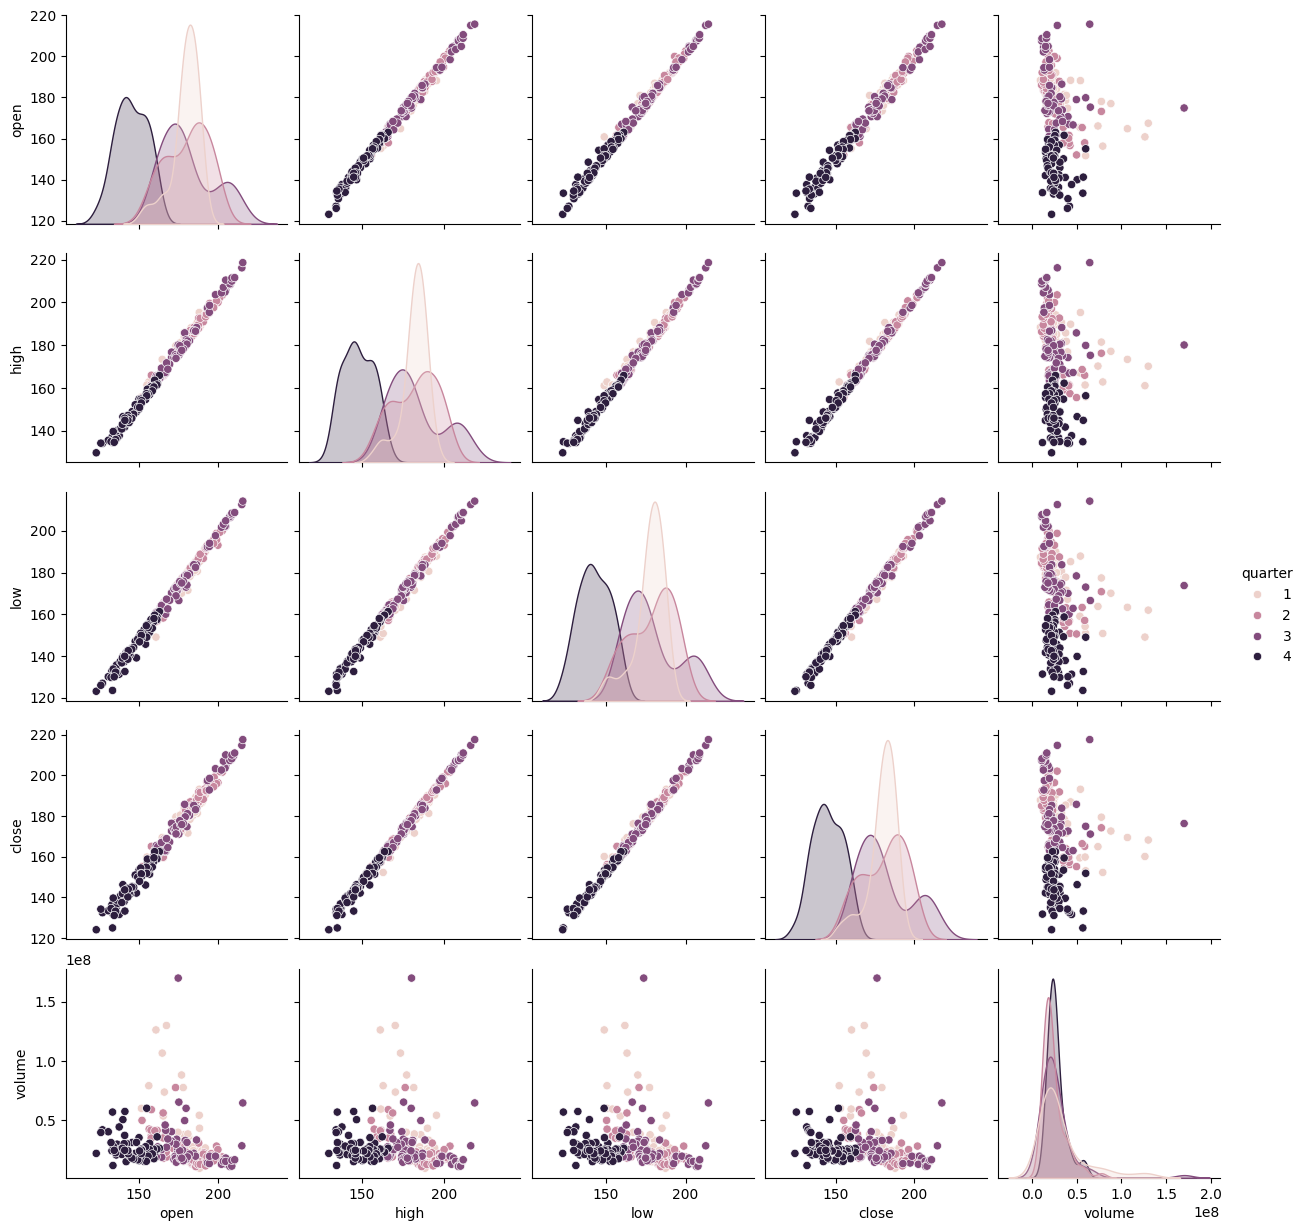

In [31]:
sns.pairplot(
 fb.assign(quarter=lambda x: x.index.quarter),
 diag_kind='kde',
 hue='quarter'
)

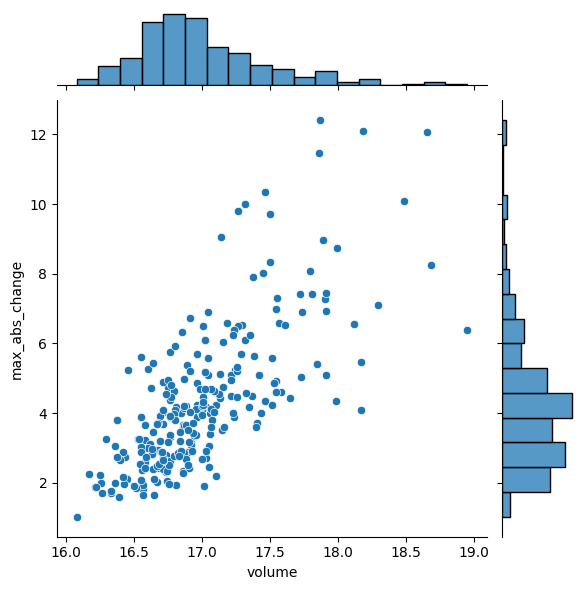

In [32]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

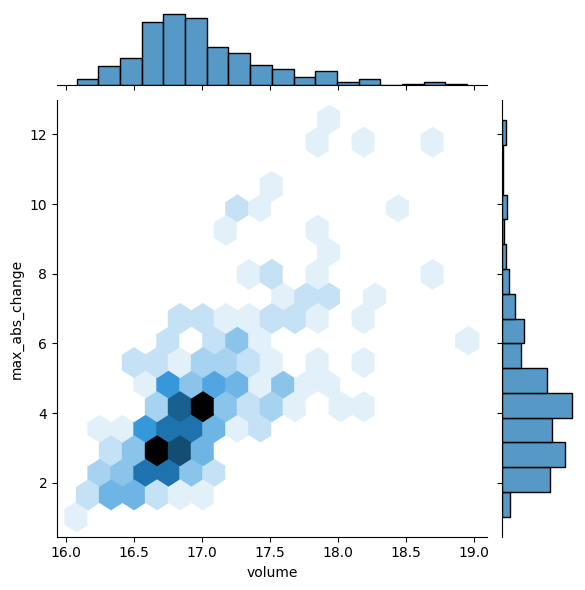

In [33]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='hex',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

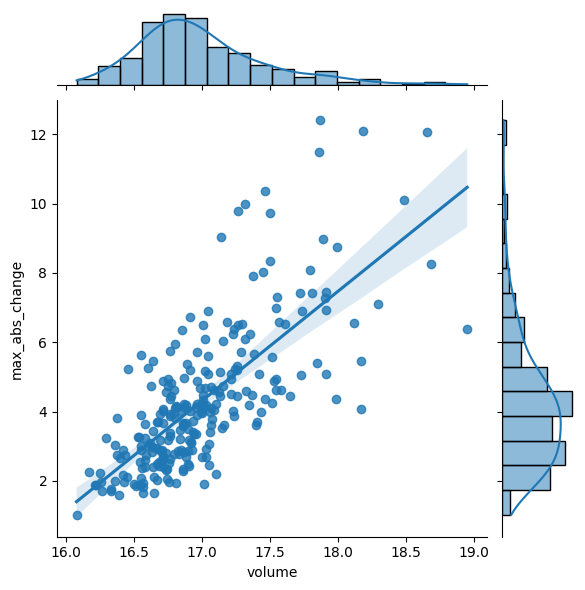

In [34]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='reg',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

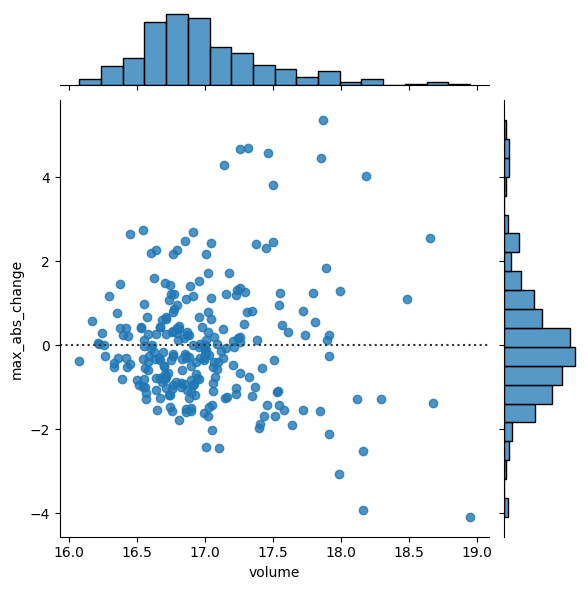

In [35]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='resid',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

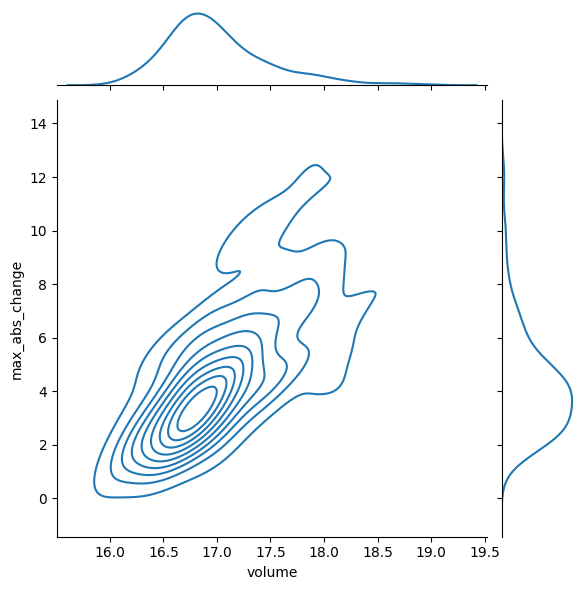

In [36]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='kde',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

In [37]:
fb_reg_data = fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [38]:
import itertools
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
 print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
 print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


In [39]:
iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
 print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
 print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


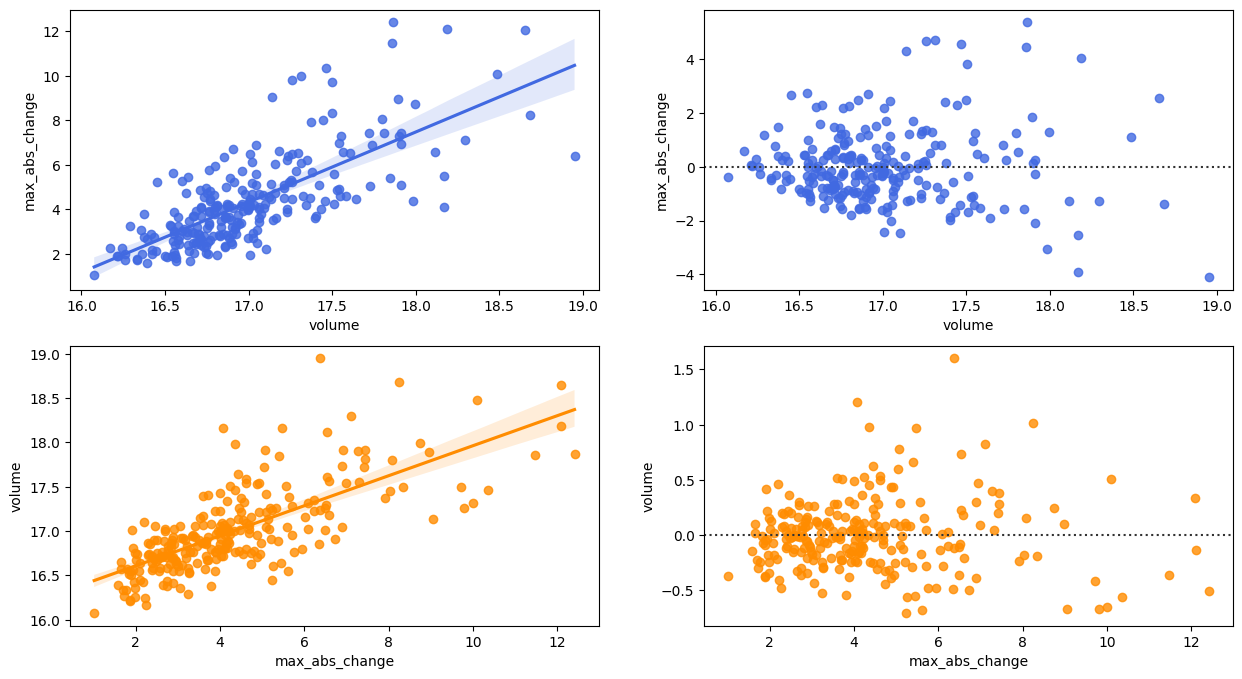

In [40]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)

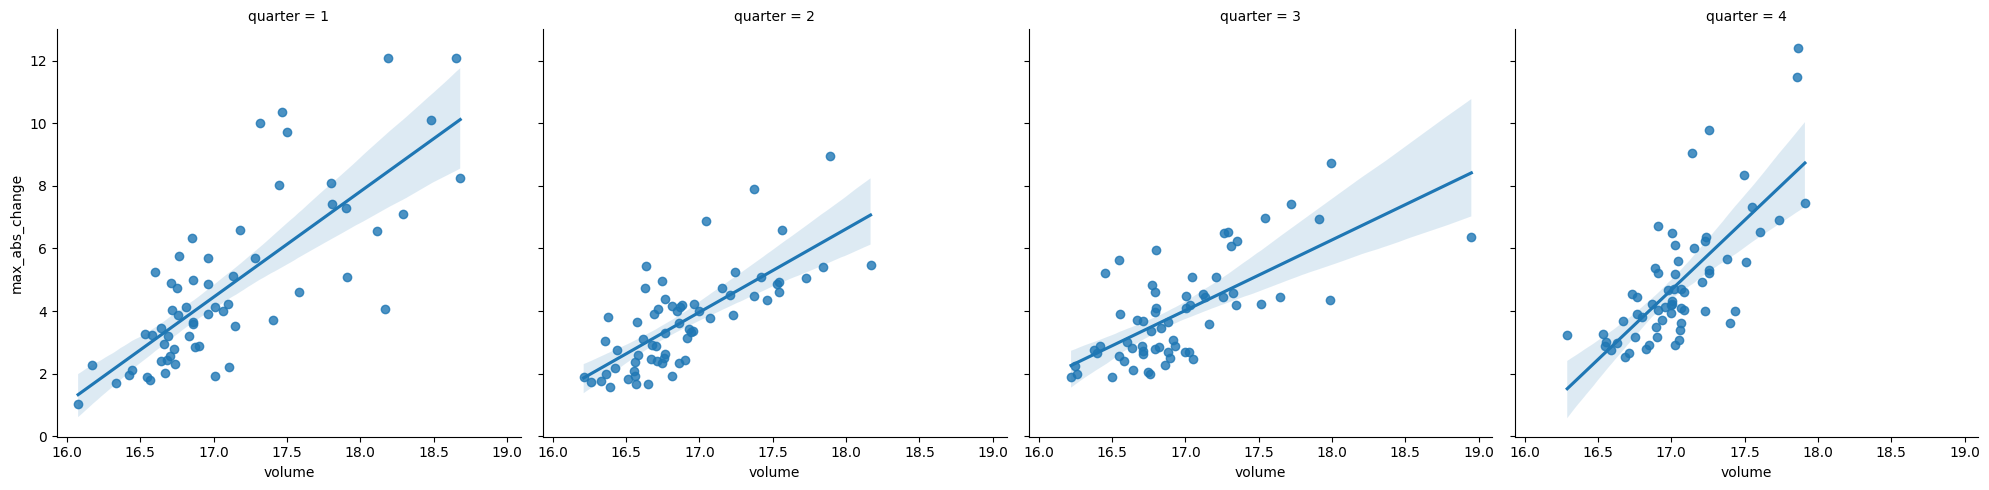

In [41]:
sns.lmplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low,
 quarter=lambda x: x.index.quarter
 ),
 col='quarter'
)

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

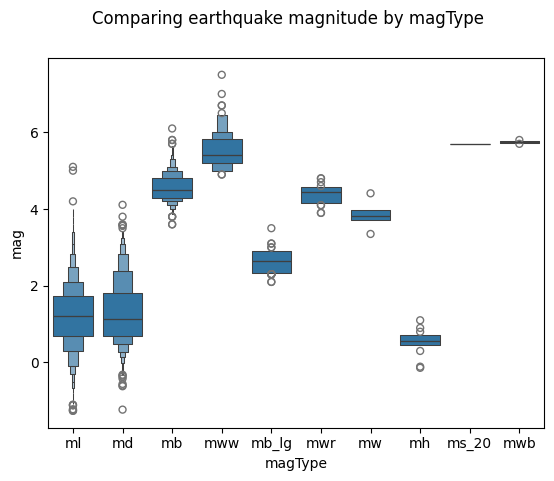

In [42]:
sns.boxenplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

<ipython-input-43-bd4e17637bf6>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

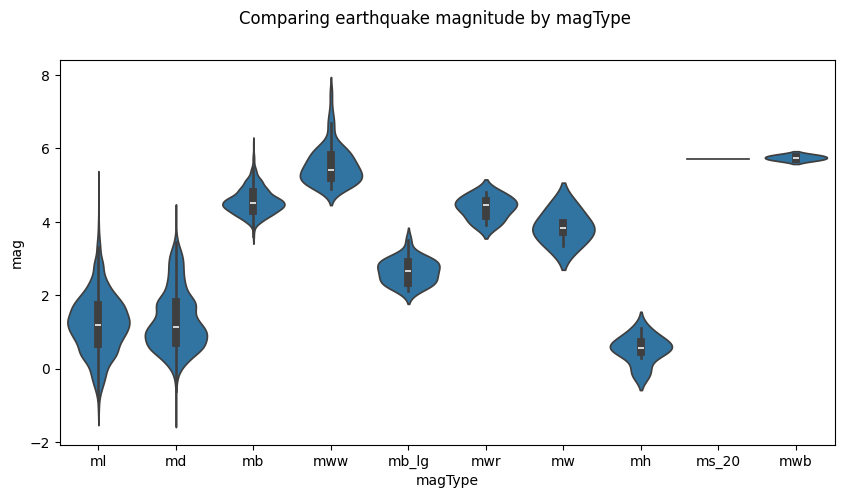

In [43]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']],
 ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')

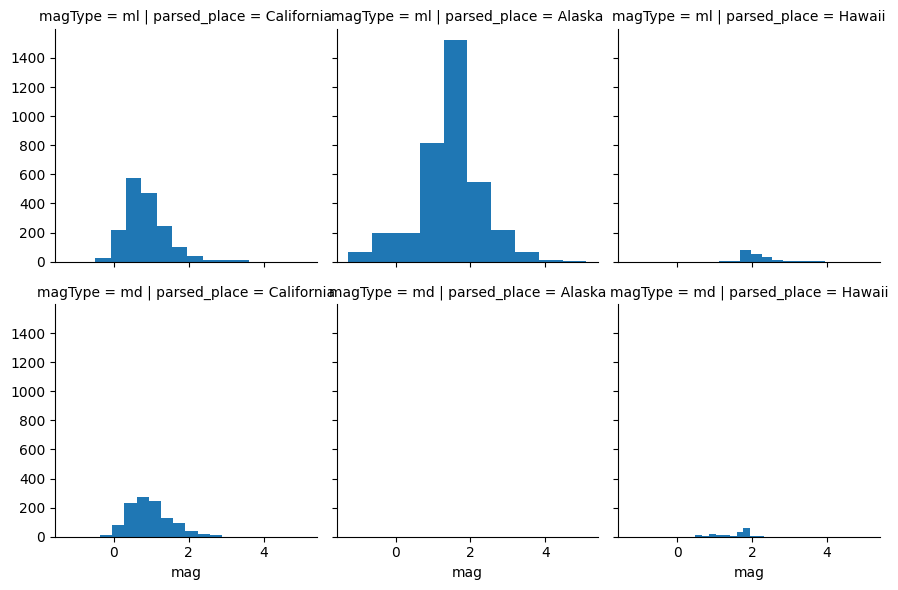

In [44]:
g = sns.FacetGrid(
 quakes[
 (quakes.parsed_place.isin([
 'California', 'Alaska', 'Hawaii'
 ]))\
 & (quakes.magType.isin(['ml', 'md']))
 ],
 row='magType',
 col='parsed_place'
)
g = g.map(plt.hist, 'mag')